In [1]:
import pandas as pd
import os

In [2]:
basepath = 'work_directory/pandas_display_matched_modifiers/'

In [3]:
file_list = os.listdir(basepath)
file_list

['v13.csv', 'v14.csv', 'v15.csv', 'v16.csv']

In [4]:
# create empty dictionary to hold dataframes as values
df_dict = {}

# loop to create a dictionary with 'filename minus extension' as the keys, and corresponding dataframes read as values
for item in file_list:
    if os.path.isfile(os.path.join(basepath, item)):
        df_dict[os.path.splitext(item)[0]] = pd.read_csv(os.path.join(basepath, item))

# check dictionary keys (values are dataframes)
df_dict.keys()

dict_keys(['v13', 'v14', 'v15', 'v16'])

In [5]:
# function to take in a string, and extract and return just the numeric part of that string (with a .zfill() of 3)
# this function would be applied on the 'Run' series to create 'part' of the 'Run_UID' (Unique ID for each run)
def run_num(string):
    start_list = [char for char in string]
    end_list = [i for i in start_list if i.isdigit()]
    return ''.join(end_list).zfill(3)

In [6]:
"""
The 'Run_UID' is created from 2 parts: 
- the numeric part of the file name (for instance: 13 from v13), and 
- the numeric part of the 'Run' series (for instance: 596 from Refine596)

So the Run_UID for file: 'v14', and Run: 'Scope15' would be '14015'.
"""

# loop over dictionary keys and values to create 'Run_UID' series in each value (dataframe)
for key, value in df_dict.items():
    value['Run_UID'] = ''.join([char for char in key if char.isdigit()]) + value['Run'].apply(run_num)
    value['Run_UID'] = value['Run_UID'].astype('int64')

In [7]:
df_dict['v13']

,Run,Max Qualities,Avg Qualities,SoS Qualities,botkm,logchanTM_E,logchanTM_N,logchanTM_S,logchanTM_W,logFTM_CF006,...,PX2,PY1,PY2,topk,wpimult_2s,X1,X2,Y1,Y2,Run_UID
0,Scope1,66.709824,23.947535,5409.466402,0.500000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,57.0,15.0,41.0,20.0,0.900000,27.0,57.0,15.0,41.0,13001
1,Scope2,18.264206,5.793805,329.962027,0.242531,-3.673868,-3.978232,-5.542949,-1.099368,-3.730401,...,40.0,22.0,48.0,21.0,0.487130,38.0,56.0,11.0,31.0,13002
2,Scope3,30.459564,17.271664,1653.862832,0.327652,-0.833367,-2.194764,-2.532870,-5.728792,-5.744374,...,50.0,23.0,44.0,40.0,0.983186,31.0,67.0,25.0,33.0,13003
3,Scope4,44.883911,16.350744,2440.625244,0.439542,-0.253802,-0.705207,-5.195248,-5.962717,-1.332546,...,42.0,5.0,40.0,9.0,0.415987,26.0,69.0,16.0,35.0,13004
4,Scope5,22.522919,7.406038,439.900066,0.847527,-5.895332,-2.788487,-0.189079,-4.295459,-1.939453,...,43.0,15.0,35.0,9.0,0.995387,36.0,67.0,3.0,39.0,13005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Refine396,34.275665,9.264459,920.125753,0.397467,-2.643085,-4.662652,-0.289525,-0.865004,-5.548265,...,51.0,23.0,39.0,21.0,0.657220,29.0,58.0,23.0,32.0,13396
396,Refine397,45.827484,14.744904,2016.923512,0.349633,-2.584347,-2.582974,-2.565437,-2.288439,-5.650323,...,67.0,4.0,37.0,9.0,0.465486,22.0,38.0,13.0,30.0,13397
397,Refine398,16.455414,9.875804,567.941422,0.250779,-3.348013,-4.136050,-1.651309,-3.628770,-0.010490,...,53.0,16.0,30.0,9.0,0.527762,34.0,59.0,24.0,39.0,13398
398,Refine399,40.062073,17.516454,2017.095552,0.455471,-2.302399,-0.964142,-3.399193,-1.948473,-3.630822,...,61.0,15.0,46.0,24.0,0.544037,38.0,66.0,18.0,32.0,13399


In [8]:
# create empty master dataframe to hold all the dataframes created above after the creating of Run_UID series in each dataframe
df = pd.DataFrame()

# loop to append all the dataframes (values) in the dictionary to the empty master dataframe
for dataframe in df_dict.values():
    df = df.append(dataframe, ignore_index=True)

df

,Run,Max Qualities,Avg Qualities,SoS Qualities,botkm,logchanTM_E,logchanTM_N,logchanTM_S,logchanTM_W,logFTM_CF006,...,PX2,PY1,PY2,topk,wpimult_2s,X1,X2,Y1,Y2,Run_UID
0,Scope1,66.709824,23.947535,5409.466402,0.500000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,57.0,15.0,41.0,20.0,0.900000,27.0,57.0,15.0,41.0,13001
1,Scope2,18.264206,5.793805,329.962027,0.242531,-3.673868,-3.978232,-5.542949,-1.099368,-3.730401,...,40.0,22.0,48.0,21.0,0.487130,38.0,56.0,11.0,31.0,13002
2,Scope3,30.459564,17.271664,1653.862832,0.327652,-0.833367,-2.194764,-2.532870,-5.728792,-5.744374,...,50.0,23.0,44.0,40.0,0.983186,31.0,67.0,25.0,33.0,13003
3,Scope4,44.883911,16.350744,2440.625244,0.439542,-0.253802,-0.705207,-5.195248,-5.962717,-1.332546,...,42.0,5.0,40.0,9.0,0.415987,26.0,69.0,16.0,35.0,13004
4,Scope5,22.522919,7.406038,439.900066,0.847527,-5.895332,-2.788487,-0.189079,-4.295459,-1.939453,...,43.0,15.0,35.0,9.0,0.995387,36.0,67.0,3.0,39.0,13005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Refine596,31.695007,9.872657,885.308765,0.919959,-0.378071,-3.860530,-1.243836,-2.642436,-1.556123,...,47.0,27.0,41.0,35.0,0.544814,31.0,51.0,26.0,49.0,16596
1796,Refine597,29.518158,10.156250,838.266102,0.874854,-4.301527,-4.909406,-1.379347,-1.395457,-2.614127,...,68.0,10.0,34.0,37.0,0.688690,33.0,58.0,28.0,43.0,16597
1797,Refine598,39.764923,9.500799,1245.244998,0.998974,-2.803779,-0.133149,-5.967882,-2.037938,-5.545689,...,41.0,10.0,50.0,31.0,0.919300,38.0,70.0,21.0,30.0,16598
1798,Refine599,49.514313,19.292570,3011.269047,0.451001,-0.990909,-3.191027,-1.447088,-5.130023,-2.234933,...,59.0,5.0,34.0,8.0,0.630074,36.0,39.0,13.0,37.0,16599


In [9]:
df.shape

(1800, 33)

In [10]:
df.set_index('Run_UID', inplace=True)
df

,Run,Max Qualities,Avg Qualities,SoS Qualities,botkm,logchanTM_E,logchanTM_N,logchanTM_S,logchanTM_W,logFTM_CF006,...,PX1,PX2,PY1,PY2,topk,wpimult_2s,X1,X2,Y1,Y2
Run_UID,,,,,,,,,,,,,,,,,,,,,
13001,Scope1,66.709824,23.947535,5409.466402,0.500000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,27.0,57.0,15.0,41.0,20.0,0.900000,27.0,57.0,15.0,41.0
13002,Scope2,18.264206,5.793805,329.962027,0.242531,-3.673868,-3.978232,-5.542949,-1.099368,-3.730401,...,35.0,40.0,22.0,48.0,21.0,0.487130,38.0,56.0,11.0,31.0
13003,Scope3,30.459564,17.271664,1653.862832,0.327652,-0.833367,-2.194764,-2.532870,-5.728792,-5.744374,...,32.0,50.0,23.0,44.0,40.0,0.983186,31.0,67.0,25.0,33.0
13004,Scope4,44.883911,16.350744,2440.625244,0.439542,-0.253802,-0.705207,-5.195248,-5.962717,-1.332546,...,29.0,42.0,5.0,40.0,9.0,0.415987,26.0,69.0,16.0,35.0
13005,Scope5,22.522919,7.406038,439.900066,0.847527,-5.895332,-2.788487,-0.189079,-4.295459,-1.939453,...,37.0,43.0,15.0,35.0,9.0,0.995387,36.0,67.0,3.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,Refine596,31.695007,9.872657,885.308765,0.919959,-0.378071,-3.860530,-1.243836,-2.642436,-1.556123,...,35.0,47.0,27.0,41.0,35.0,0.544814,31.0,51.0,26.0,49.0
16597,Refine597,29.518158,10.156250,838.266102,0.874854,-4.301527,-4.909406,-1.379347,-1.395457,-2.614127,...,26.0,68.0,10.0,34.0,37.0,0.688690,33.0,58.0,28.0,43.0
16598,Refine598,39.764923,9.500799,1245.244998,0.998974,-2.803779,-0.133149,-5.967882,-2.037938,-5.545689,...,33.0,41.0,10.0,50.0,31.0,0.919300,38.0,70.0,21.0,30.0


In [11]:
df.index

Int64Index([13001, 13002, 13003, 13004, 13005, 13006, 13007, 13008, 13009,
            13010,
            ...
            16591, 16592, 16593, 16594, 16595, 16596, 16597, 16598, 16599,
            16600],
           dtype='int64', name='Run_UID', length=1800)

In [12]:
matched_run_list = [13261, 13270, 13271, 13345, 13347, 13365, 13382, 13384, 13386, 13395, 14340, 15339, 16474, 16487, 16515, 16532, 16567, 16580]
matched_run_list

[13261,
 13270,
 13271,
 13345,
 13347,
 13365,
 13382,
 13384,
 13386,
 13395,
 14340,
 15339,
 16474,
 16487,
 16515,
 16532,
 16567,
 16580]

In [13]:
df = df.loc[matched_run_list]
df

,Run,Max Qualities,Avg Qualities,SoS Qualities,botkm,logchanTM_E,logchanTM_N,logchanTM_S,logchanTM_W,logFTM_CF006,...,PX1,PX2,PY1,PY2,topk,wpimult_2s,X1,X2,Y1,Y2
Run_UID,,,,,,,,,,,,,,,,,,,,,
13261,Refine261,14.737167,4.142334,218.269697,0.311551,-4.597953,-1.126846,-2.606502,-0.146739,-0.709962,...,37.0,70.0,16.0,30.0,21.0,0.901114,30.0,47.0,23.0,30.0
13270,Refine270,11.132339,2.918213,91.316567,0.238426,-4.283723,-3.146479,-2.210536,-1.751493,-2.023417,...,34.0,42.0,26.0,34.0,25.0,0.490190,35.0,39.0,17.0,39.0
13271,Refine271,14.879929,4.198869,194.616071,0.999263,-5.683819,-5.011996,-2.711559,-0.305945,-4.285205,...,31.0,40.0,23.0,38.0,27.0,0.718884,36.0,50.0,24.0,40.0
13345,Refine345,15.110519,5.248723,239.115333,0.514267,-3.440452,-0.496733,-0.485153,-2.217658,-3.295393,...,33.0,68.0,18.0,30.0,15.0,0.872514,38.0,51.0,3.0,41.0
13347,Refine347,10.372177,2.638167,72.673602,0.933644,-5.076900,-0.971489,-3.571889,-2.762635,-5.560662,...,27.0,65.0,19.0,42.0,28.0,0.463695,38.0,41.0,20.0,31.0
13365,Refine365,13.483810,3.304555,120.511139,0.507534,-2.250383,-4.131851,-2.540536,-0.615929,-3.771545,...,28.0,60.0,28.0,42.0,21.0,0.721685,33.0,48.0,19.0,31.0
13382,Refine382,23.153809,6.000375,392.147613,0.021627,-3.900559,-4.094971,-2.276435,-0.587472,-4.107830,...,37.0,63.0,11.0,35.0,25.0,0.832765,38.0,45.0,28.0,42.0
13384,Refine384,17.010208,4.769101,260.544198,0.159012,-3.346878,-1.839516,-3.602069,-0.178475,-4.260723,...,31.0,58.0,24.0,33.0,18.0,0.626166,35.0,49.0,15.0,32.0
13386,Refine386,3.992859,1.177728,14.782397,0.495558,-5.797102,-2.816883,-2.039460,-0.555108,-5.621522,...,34.0,38.0,28.0,30.0,18.0,0.792749,38.0,52.0,20.0,31.0


In [14]:
df.shape

(18, 32)

In [15]:
df.dtypes

Run               object
Max Qualities    float64
Avg Qualities    float64
SoS Qualities    float64
botkm            float64
logchanTM_E      float64
logchanTM_N      float64
logchanTM_S      float64
logchanTM_W      float64
logFTM_CF006     float64
logFTM_CF007     float64
logFTM_SSF016    float64
logFTM_SSF017    float64
logFTM_SSF018    float64
logFTM_SSF019    float64
logFTM_SSF020    float64
logFTM_SSF021    float64
logFTM_SSF023    float64
logFTM_SSF024    float64
oilvismult       float64
permmult         float64
permmult_asph    float64
PX1              float64
PX2              float64
PY1              float64
PY2              float64
topk             float64
wpimult_2s       float64
X1               float64
X2               float64
Y1               float64
Y2               float64
dtype: object

In [16]:
df[['X1', 'X2', 'Y1', 'Y2', 'PX1', 'PX2', 'PY1', 'PY2', 'topk']] = df[['X1', 'X2', 'Y1', 'Y2', 'PX1', 'PX2', 'PY1', 'PY2', 'topk']].astype('int64')
df.dtypes

Run               object
Max Qualities    float64
Avg Qualities    float64
SoS Qualities    float64
botkm            float64
logchanTM_E      float64
logchanTM_N      float64
logchanTM_S      float64
logchanTM_W      float64
logFTM_CF006     float64
logFTM_CF007     float64
logFTM_SSF016    float64
logFTM_SSF017    float64
logFTM_SSF018    float64
logFTM_SSF019    float64
logFTM_SSF020    float64
logFTM_SSF021    float64
logFTM_SSF023    float64
logFTM_SSF024    float64
oilvismult       float64
permmult         float64
permmult_asph    float64
PX1                int64
PX2                int64
PY1                int64
PY2                int64
topk               int64
wpimult_2s       float64
X1                 int64
X2                 int64
Y1                 int64
Y2                 int64
dtype: object

In [17]:
df.to_excel(os.path.join(basepath, 'output.xlsx'))

***

# Extending the dataframe with calculated modifiers

In [18]:
df_calc = df.copy()

In [19]:
df_calc.shape

(18, 32)

In [20]:
df_calc

,Run,Max Qualities,Avg Qualities,SoS Qualities,botkm,logchanTM_E,logchanTM_N,logchanTM_S,logchanTM_W,logFTM_CF006,...,PX1,PX2,PY1,PY2,topk,wpimult_2s,X1,X2,Y1,Y2
Run_UID,,,,,,,,,,,,,,,,,,,,,
13261,Refine261,14.737167,4.142334,218.269697,0.311551,-4.597953,-1.126846,-2.606502,-0.146739,-0.709962,...,37,70,16,30,21,0.901114,30,47,23,30
13270,Refine270,11.132339,2.918213,91.316567,0.238426,-4.283723,-3.146479,-2.210536,-1.751493,-2.023417,...,34,42,26,34,25,0.490190,35,39,17,39
13271,Refine271,14.879929,4.198869,194.616071,0.999263,-5.683819,-5.011996,-2.711559,-0.305945,-4.285205,...,31,40,23,38,27,0.718884,36,50,24,40
13345,Refine345,15.110519,5.248723,239.115333,0.514267,-3.440452,-0.496733,-0.485153,-2.217658,-3.295393,...,33,68,18,30,15,0.872514,38,51,3,41
13347,Refine347,10.372177,2.638167,72.673602,0.933644,-5.076900,-0.971489,-3.571889,-2.762635,-5.560662,...,27,65,19,42,28,0.463695,38,41,20,31
13365,Refine365,13.483810,3.304555,120.511139,0.507534,-2.250383,-4.131851,-2.540536,-0.615929,-3.771545,...,28,60,28,42,21,0.721685,33,48,19,31
13382,Refine382,23.153809,6.000375,392.147613,0.021627,-3.900559,-4.094971,-2.276435,-0.587472,-4.107830,...,37,63,11,35,25,0.832765,38,45,28,42
13384,Refine384,17.010208,4.769101,260.544198,0.159012,-3.346878,-1.839516,-3.602069,-0.178475,-4.260723,...,31,58,24,33,18,0.626166,35,49,15,32
13386,Refine386,3.992859,1.177728,14.782397,0.495558,-5.797102,-2.816883,-2.039460,-0.555108,-5.621522,...,34,38,28,30,18,0.792749,38,52,20,31


In [21]:
# IJ index of mid perforation in the well
perf_mid = (38, 30)

# x and y dimensions of grid cells in meters
cell_dx, cell_dy = 5, 5

In [22]:
# calculate columns for distances to boundaries in E, W, N and S
df_calc['bound_dist_E'] = -((perf_mid[0] - df_calc['X1']) + 1) * cell_dx
df_calc['bound_dist_W'] = ((df_calc['X2'] - perf_mid[0]) + 1) * cell_dx
df_calc['bound_dist_N'] = -((perf_mid[1] - df_calc['Y1']) + 1) * cell_dy
df_calc['bound_dist_S'] = ((df_calc['Y2'] - perf_mid[1]) + 1) * cell_dy

df_calc

,Run,Max Qualities,Avg Qualities,SoS Qualities,botkm,logchanTM_E,logchanTM_N,logchanTM_S,logchanTM_W,logFTM_CF006,...,topk,wpimult_2s,X1,X2,Y1,Y2,bound_dist_E,bound_dist_W,bound_dist_N,bound_dist_S
Run_UID,,,,,,,,,,,,,,,,,,,,,
13261,Refine261,14.737167,4.142334,218.269697,0.311551,-4.597953,-1.126846,-2.606502,-0.146739,-0.709962,...,21,0.901114,30,47,23,30,-45,50,-40,5
13270,Refine270,11.132339,2.918213,91.316567,0.238426,-4.283723,-3.146479,-2.210536,-1.751493,-2.023417,...,25,0.490190,35,39,17,39,-20,10,-70,50
13271,Refine271,14.879929,4.198869,194.616071,0.999263,-5.683819,-5.011996,-2.711559,-0.305945,-4.285205,...,27,0.718884,36,50,24,40,-15,65,-35,55
13345,Refine345,15.110519,5.248723,239.115333,0.514267,-3.440452,-0.496733,-0.485153,-2.217658,-3.295393,...,15,0.872514,38,51,3,41,-5,70,-140,60
13347,Refine347,10.372177,2.638167,72.673602,0.933644,-5.076900,-0.971489,-3.571889,-2.762635,-5.560662,...,28,0.463695,38,41,20,31,-5,20,-55,10
13365,Refine365,13.483810,3.304555,120.511139,0.507534,-2.250383,-4.131851,-2.540536,-0.615929,-3.771545,...,21,0.721685,33,48,19,31,-30,55,-60,10
13382,Refine382,23.153809,6.000375,392.147613,0.021627,-3.900559,-4.094971,-2.276435,-0.587472,-4.107830,...,25,0.832765,38,45,28,42,-5,40,-15,65
13384,Refine384,17.010208,4.769101,260.544198,0.159012,-3.346878,-1.839516,-3.602069,-0.178475,-4.260723,...,18,0.626166,35,49,15,32,-20,60,-80,15
13386,Refine386,3.992859,1.177728,14.782397,0.495558,-5.797102,-2.816883,-2.039460,-0.555108,-5.621522,...,18,0.792749,38,52,20,31,-5,75,-55,10


In [23]:
'''
This cell is calculating the 'botk' series (based on the 'topk' and 'botkm' series) to find out where exactly is the 
lowest k index for the perforations.
'''

# calculate min, max and max_interval for 'botk'
botk_min = df_calc['topk'] + 10
botk_max = 90
botk_max_interval = botk_max - botk_min

# calculate 'botk' used in the runs
df_calc['botk'] = botk_min + (df_calc['botkm'] * botk_max_interval)

# cast 'botk' data type to 'int64'
df_calc['botk'] = df_calc['botk'].astype('int64')

df_calc

# calculated 'botk' series is cross-checked against actual 'botk' values used in the runs.

,Run,Max Qualities,Avg Qualities,SoS Qualities,botkm,logchanTM_E,logchanTM_N,logchanTM_S,logchanTM_W,logFTM_CF006,...,wpimult_2s,X1,X2,Y1,Y2,bound_dist_E,bound_dist_W,bound_dist_N,bound_dist_S,botk
Run_UID,,,,,,,,,,,,,,,,,,,,,
13261,Refine261,14.737167,4.142334,218.269697,0.311551,-4.597953,-1.126846,-2.606502,-0.146739,-0.709962,...,0.901114,30,47,23,30,-45,50,-40,5,49
13270,Refine270,11.132339,2.918213,91.316567,0.238426,-4.283723,-3.146479,-2.210536,-1.751493,-2.023417,...,0.490190,35,39,17,39,-20,10,-70,50,48
13271,Refine271,14.879929,4.198869,194.616071,0.999263,-5.683819,-5.011996,-2.711559,-0.305945,-4.285205,...,0.718884,36,50,24,40,-15,65,-35,55,89
13345,Refine345,15.110519,5.248723,239.115333,0.514267,-3.440452,-0.496733,-0.485153,-2.217658,-3.295393,...,0.872514,38,51,3,41,-5,70,-140,60,58
13347,Refine347,10.372177,2.638167,72.673602,0.933644,-5.076900,-0.971489,-3.571889,-2.762635,-5.560662,...,0.463695,38,41,20,31,-5,20,-55,10,86
13365,Refine365,13.483810,3.304555,120.511139,0.507534,-2.250383,-4.131851,-2.540536,-0.615929,-3.771545,...,0.721685,33,48,19,31,-30,55,-60,10,60
13382,Refine382,23.153809,6.000375,392.147613,0.021627,-3.900559,-4.094971,-2.276435,-0.587472,-4.107830,...,0.832765,38,45,28,42,-5,40,-15,65,36
13384,Refine384,17.010208,4.769101,260.544198,0.159012,-3.346878,-1.839516,-3.602069,-0.178475,-4.260723,...,0.626166,35,49,15,32,-20,60,-80,15,37
13386,Refine386,3.992859,1.177728,14.782397,0.495558,-5.797102,-2.816883,-2.039460,-0.555108,-5.621522,...,0.792749,38,52,20,31,-5,75,-55,10,58


In [24]:
# calculate 'diffk' series which is the difference between 'topk' and 'botk' series
df_calc['diffk'] = df_calc['botk'] - df_calc['topk'] + 1

df_calc

,Run,Max Qualities,Avg Qualities,SoS Qualities,botkm,logchanTM_E,logchanTM_N,logchanTM_S,logchanTM_W,logFTM_CF006,...,X1,X2,Y1,Y2,bound_dist_E,bound_dist_W,bound_dist_N,bound_dist_S,botk,diffk
Run_UID,,,,,,,,,,,,,,,,,,,,,
13261,Refine261,14.737167,4.142334,218.269697,0.311551,-4.597953,-1.126846,-2.606502,-0.146739,-0.709962,...,30,47,23,30,-45,50,-40,5,49,29
13270,Refine270,11.132339,2.918213,91.316567,0.238426,-4.283723,-3.146479,-2.210536,-1.751493,-2.023417,...,35,39,17,39,-20,10,-70,50,48,24
13271,Refine271,14.879929,4.198869,194.616071,0.999263,-5.683819,-5.011996,-2.711559,-0.305945,-4.285205,...,36,50,24,40,-15,65,-35,55,89,63
13345,Refine345,15.110519,5.248723,239.115333,0.514267,-3.440452,-0.496733,-0.485153,-2.217658,-3.295393,...,38,51,3,41,-5,70,-140,60,58,44
13347,Refine347,10.372177,2.638167,72.673602,0.933644,-5.076900,-0.971489,-3.571889,-2.762635,-5.560662,...,38,41,20,31,-5,20,-55,10,86,59
13365,Refine365,13.483810,3.304555,120.511139,0.507534,-2.250383,-4.131851,-2.540536,-0.615929,-3.771545,...,33,48,19,31,-30,55,-60,10,60,40
13382,Refine382,23.153809,6.000375,392.147613,0.021627,-3.900559,-4.094971,-2.276435,-0.587472,-4.107830,...,38,45,28,42,-5,40,-15,65,36,12
13384,Refine384,17.010208,4.769101,260.544198,0.159012,-3.346878,-1.839516,-3.602069,-0.178475,-4.260723,...,35,49,15,32,-20,60,-80,15,37,20
13386,Refine386,3.992859,1.177728,14.782397,0.495558,-5.797102,-2.816883,-2.039460,-0.555108,-5.621522,...,38,52,20,31,-5,75,-55,10,58,41


In [94]:
# calculate boundary TM as decimal numbers instead of exponents of 10
df_calc['bound_TM_N'] = 10 ** df_calc['logchanTM_N']
df_calc['bound_TM_S'] = 10 ** df_calc['logchanTM_S']
df_calc['bound_TM_E'] = 10 ** df_calc['logchanTM_E']
df_calc['bound_TM_W'] = 10 ** df_calc['logchanTM_W']

df_calc

# these calculated series were planned to be used in plotting later, but were not eventually used due to the logarithmic scale issue.

,Run,Max Qualities,Avg Qualities,SoS Qualities,botkm,logchanTM_E,logchanTM_N,logchanTM_S,logchanTM_W,logFTM_CF006,...,bound_dist_E,bound_dist_W,bound_dist_N,bound_dist_S,botk,diffk,bound_TM_N,bound_TM_S,bound_TM_E,bound_TM_W
Run_UID,,,,,,,,,,,,,,,,,,,,,
13261,Refine261,14.737167,4.142334,218.269697,0.311551,-4.597953,-1.126846,-2.606502,-0.146739,-0.709962,...,-45,50,-40,5,49,29,0.074671,0.002475,0.000025,0.713282
13270,Refine270,11.132339,2.918213,91.316567,0.238426,-4.283723,-3.146479,-2.210536,-1.751493,-2.023417,...,-20,10,-70,50,48,24,0.000714,0.006158,0.000052,0.017722
13271,Refine271,14.879929,4.198869,194.616071,0.999263,-5.683819,-5.011996,-2.711559,-0.305945,-4.285205,...,-15,65,-35,55,89,63,0.000010,0.001943,0.000002,0.494374
13345,Refine345,15.110519,5.248723,239.115333,0.514267,-3.440452,-0.496733,-0.485153,-2.217658,-3.295393,...,-5,70,-140,60,58,44,0.318616,0.327225,0.000363,0.006058
13347,Refine347,10.372177,2.638167,72.673602,0.933644,-5.076900,-0.971489,-3.571889,-2.762635,-5.560662,...,-5,20,-55,10,86,59,0.106785,0.000268,0.000008,0.001727
13365,Refine365,13.483810,3.304555,120.511139,0.507534,-2.250383,-4.131851,-2.540536,-0.615929,-3.771545,...,-30,55,-60,10,60,40,0.000074,0.002880,0.005618,0.242142
13382,Refine382,23.153809,6.000375,392.147613,0.021627,-3.900559,-4.094971,-2.276435,-0.587472,-4.107830,...,-5,40,-15,65,36,12,0.000080,0.005291,0.000126,0.258540
13384,Refine384,17.010208,4.769101,260.544198,0.159012,-3.346878,-1.839516,-3.602069,-0.178475,-4.260723,...,-20,60,-80,15,37,20,0.014471,0.000250,0.000450,0.663017
13386,Refine386,3.992859,1.177728,14.782397,0.495558,-5.797102,-2.816883,-2.039460,-0.555108,-5.621522,...,-5,75,-55,10,58,41,0.001524,0.009131,0.000002,0.278543


In [91]:
df_calc.dtypes

Run               object
Max Qualities    float64
Avg Qualities    float64
SoS Qualities    float64
botkm            float64
logchanTM_E      float64
logchanTM_N      float64
logchanTM_S      float64
logchanTM_W      float64
logFTM_CF006     float64
logFTM_CF007     float64
logFTM_SSF016    float64
logFTM_SSF017    float64
logFTM_SSF018    float64
logFTM_SSF019    float64
logFTM_SSF020    float64
logFTM_SSF021    float64
logFTM_SSF023    float64
logFTM_SSF024    float64
oilvismult       float64
permmult         float64
permmult_asph    float64
PX1                int64
PX2                int64
PY1                int64
PY2                int64
topk               int64
wpimult_2s       float64
X1                 int64
X2                 int64
Y1                 int64
Y2                 int64
bound_dist_E       int64
bound_dist_W       int64
bound_dist_N       int64
bound_dist_S       int64
botk               int64
diffk              int64
bound_TM_N       float64
bound_TM_S       float64


***

# Modifier distribution histograms: Standalone plots

In [26]:
from matplotlib import pyplot as plt

In [27]:
plt.ion()

In [28]:
plt.style.use('fivethirtyeight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002191ED4C208>,
      dtype=object)

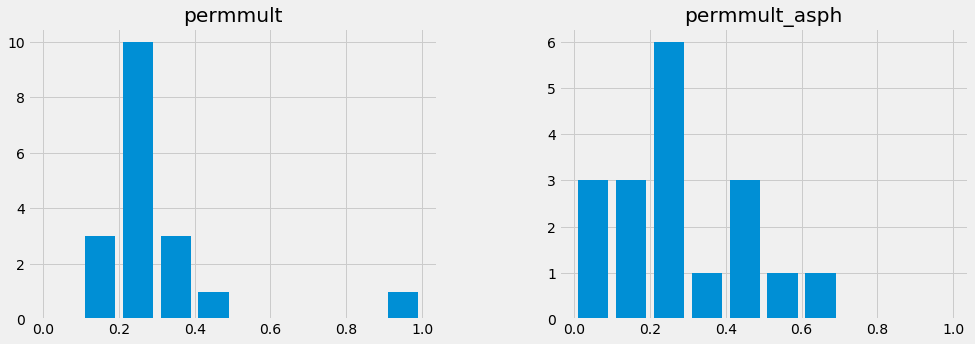

In [60]:
df.hist(column=['permmult', 'permmult_asph' ], range=(0,1), bins=10, figsize=(15,5), rwidth=0.8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002191EFB7E08>,
      dtype=object)

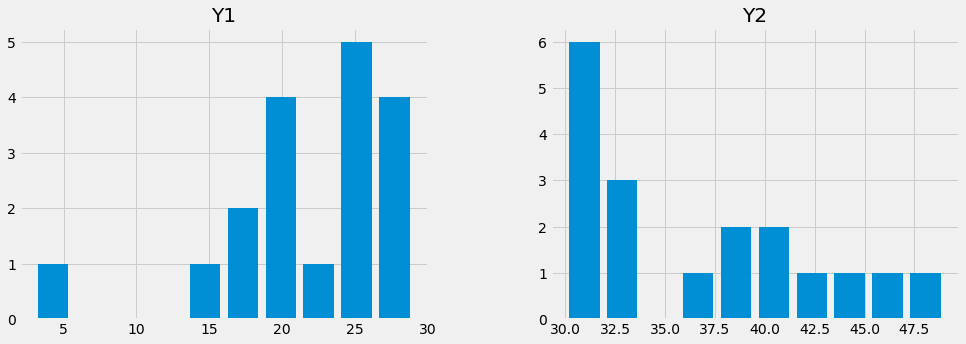

In [61]:
df.hist(column=['Y1', 'Y2' ], bins=10, figsize=(15,5),  label=['North', 'South'], rwidth=0.8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002191F0B6B48>,
      dtype=object)

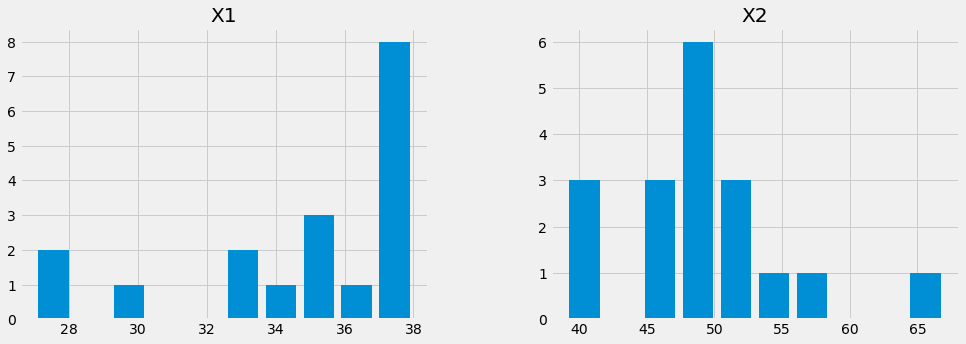

In [62]:
df.hist(column=['X1', 'X2' ], bins=10, figsize=(15,5), rwidth=0.8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002191F380F88>,
      dtype=object)

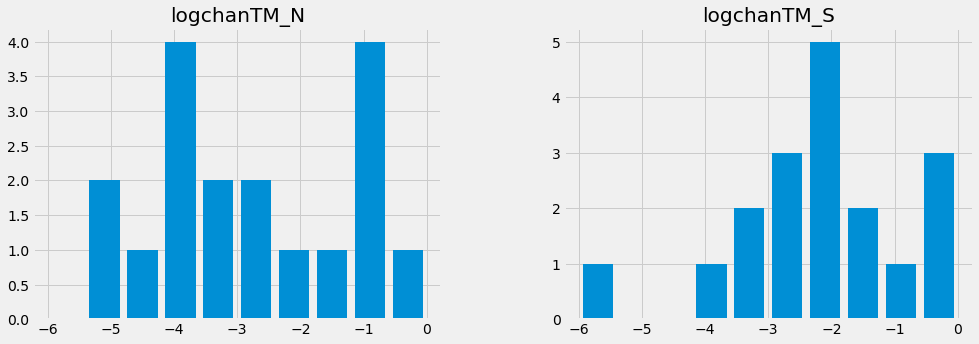

In [63]:
df.hist(column=['logchanTM_N', 'logchanTM_S' ], bins=10, range=(-6,0), figsize=(15,5), rwidth=0.8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002191F7F2408>,
      dtype=object)

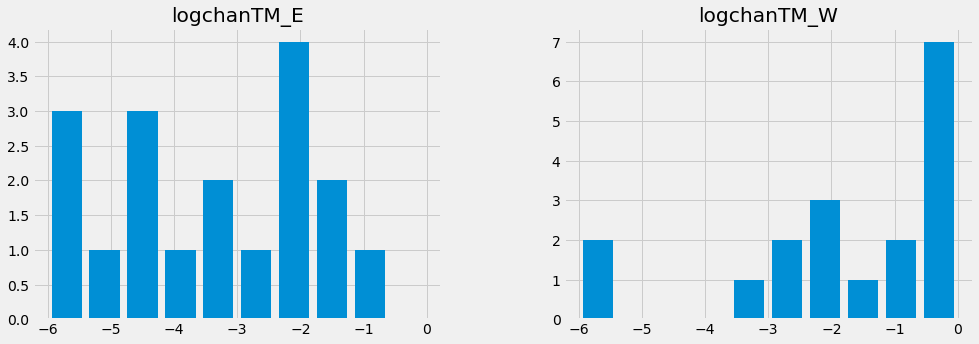

In [65]:
df.hist(column=['logchanTM_E', 'logchanTM_W' ], bins=10, range=(-6,0), figsize=(15,5), rwidth=0.8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002191FA49308>,
      dtype=object)

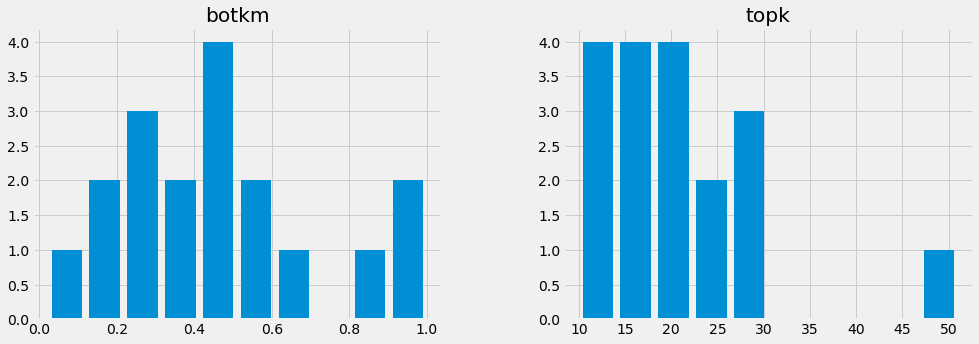

In [66]:
df.hist(column=['topk', 'botkm' ], bins=10, figsize=(15,5), rwidth=0.8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002192011FE08>]],
      dtype=object)

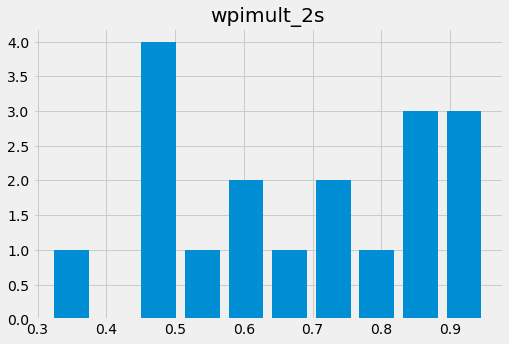

In [67]:
df.hist(column='wpimult_2s', bins=10, figsize=(7.5,5), rwidth=0.8)

***

# Modifier distribution histograms: Subplots (combined)

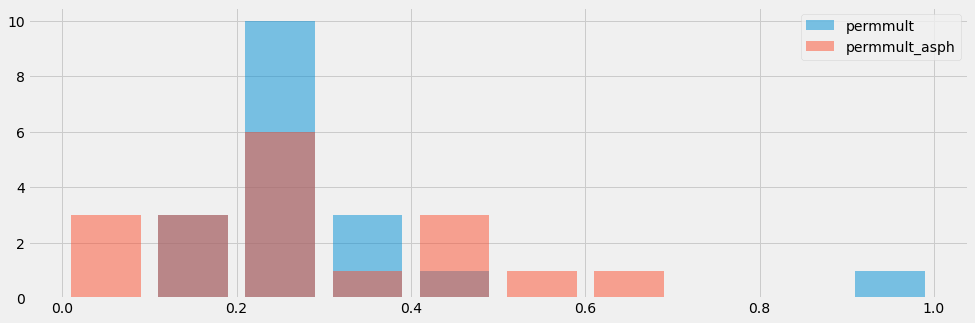

In [68]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,5))

ax.hist(df.loc[:,'permmult'], range=(0,1), bins=10, alpha=0.5, label='permmult', rwidth=0.8)
ax.hist(df.loc[:,'permmult_asph'], range=(0,1), bins=10, alpha=0.5, label='permmult_asph', rwidth=0.8)

ax.legend(loc='upper right')

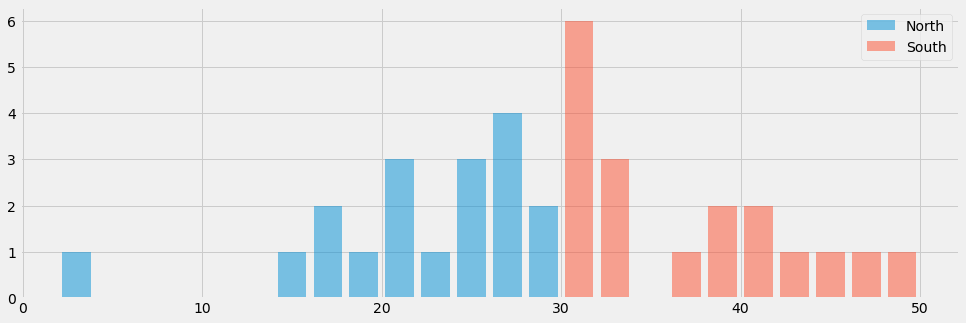

In [73]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,5))

ax.hist(df.loc[:,'Y1'], range=(2,50), bins=24, alpha=0.5, label='North', rwidth=0.8)
ax.hist(df.loc[:,'Y2'], range=(2,50), bins=24, alpha=0.5, label='South', rwidth=0.8)

ax.legend(loc='upper right')

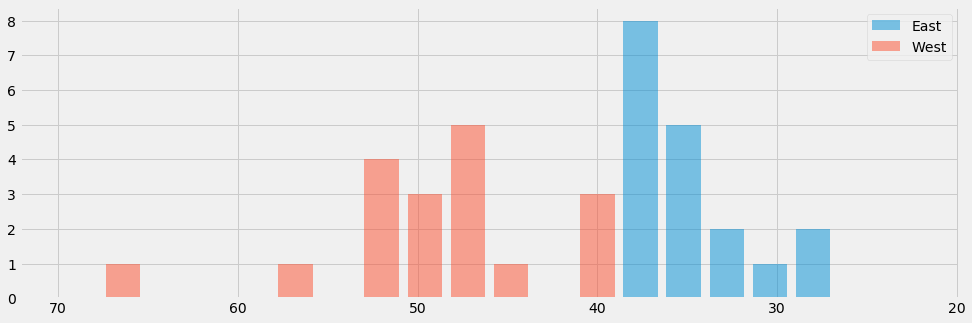

In [52]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,5))

ax.hist(df.loc[:,'X1'], range=(22,70), bins=20, alpha=0.5, label='East', rwidth=0.8)
ax.hist(df.loc[:,'X2'], range=(22,70), bins=20, alpha=0.5, label='West', rwidth=0.8)

ax.legend(loc='upper right')

# invert x-axis
plt.gca().invert_xaxis()

Text(0.5, 1.0, 'East')

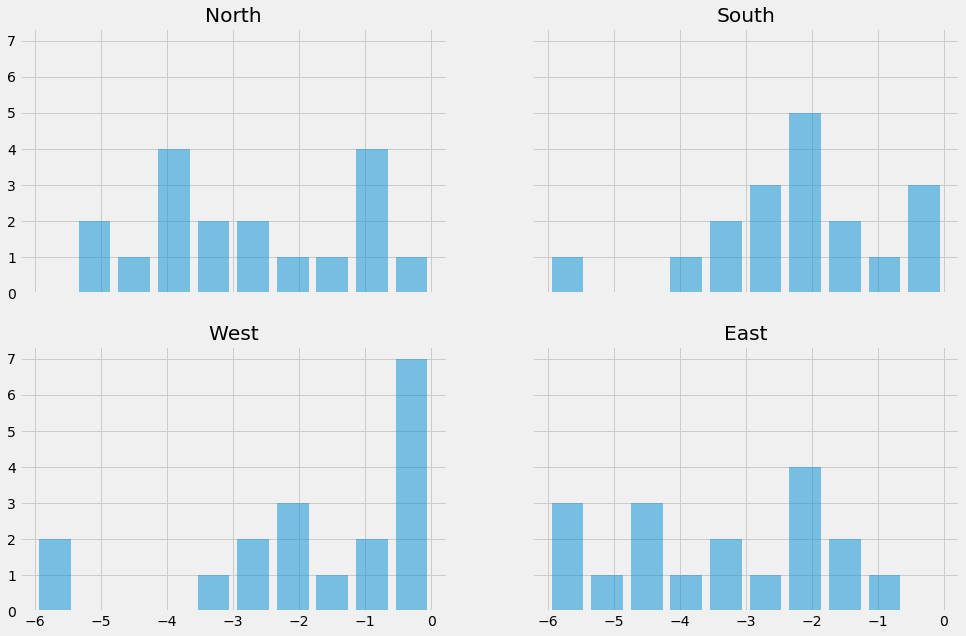

In [97]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10))

ax = ax.ravel()

ax[0].hist(df.loc[:,'logchanTM_N'], range=(-6,0), bins=10, alpha=0.5, label='North', rwidth=0.8)
ax[0].set_title('North')

ax[1].hist(df.loc[:,'logchanTM_S'], range=(-6,0), bins=10, alpha=0.5, label='South', rwidth=0.8)
ax[1].set_title('South')

ax[2].hist(df.loc[:,'logchanTM_W'], range=(-6,0), bins=10, alpha=0.5, label='West', rwidth=0.8)
ax[2].set_title('West')

ax[3].hist(df.loc[:,'logchanTM_E'], range=(-6,0), bins=10, alpha=0.5, label='East', rwidth=0.8)
ax[3].set_title('East')

***

# Calculated variable distribution histograms

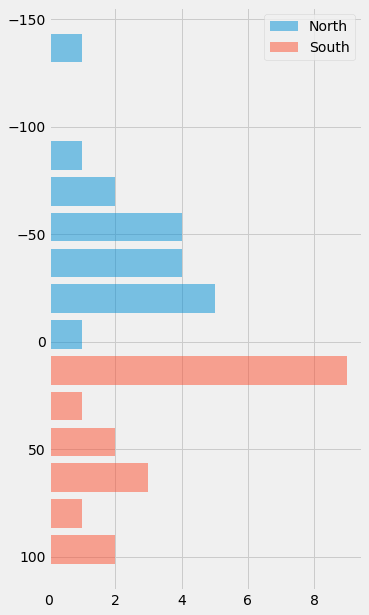

In [78]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(5,10))

ax.hist(df_calc.loc[:,'bound_dist_N'], range=(-145,105), bins=15, alpha=0.5, label='North', orientation='horizontal', rwidth=0.8)
ax.hist(df_calc.loc[:,'bound_dist_S'], range=(-145,105), bins=15, alpha=0.5, label='South', orientation='horizontal', rwidth=0.8)

ax.legend(loc='upper right')

# invert y-axis
plt.gca().invert_yaxis()

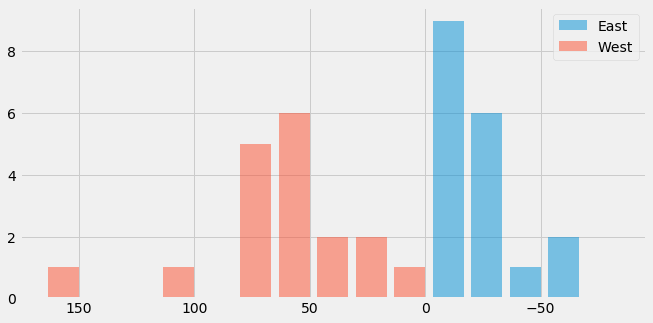

In [87]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))

ax.hist(df_calc.loc[:,'bound_dist_E'], range=(-85,165), bins=15, alpha=0.5, label='East', rwidth=0.8)
ax.hist(df_calc.loc[:,'bound_dist_W'], range=(-85,165), bins=15, alpha=0.5, label='West', rwidth=0.8)

ax.legend(loc='upper right')

# invert x-axis
plt.gca().invert_xaxis()

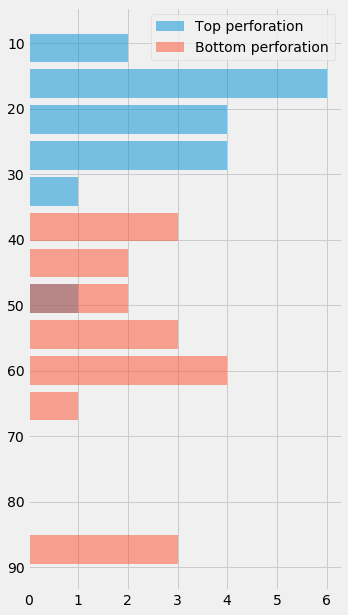

In [88]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(5,10))

ax.hist(df_calc.loc[:,'topk'], range=(8,90), bins=15, alpha=0.5, label='Top perforation', orientation='horizontal', rwidth=0.8)
ax.hist(df_calc.loc[:,'botk'], range=(8,90), bins=15, alpha=0.5, label='Bottom perforation', orientation='horizontal', rwidth=0.8)

ax.legend(loc='upper right')

# invert y-axis
plt.gca().invert_yaxis()

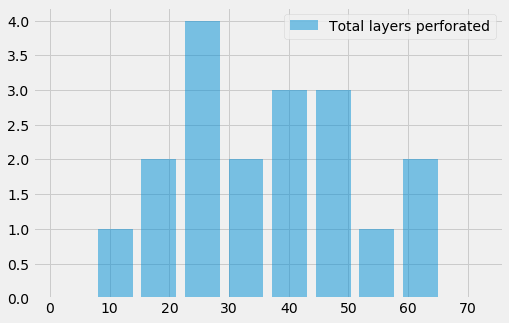

In [86]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(7.5,5))

ax.hist(df_calc.loc[:,'diffk'], range=(0,73), bins=10, alpha=0.5, label='Total layers perforated', rwidth=0.8)

ax.legend(loc='upper right')

# Statistical summary

In [44]:
df[['permmult', 'permmult_asph', 'X1', 'X2', 'Y1', 'Y2', 'topk', 'botkm', 'wpimult_2s']].describe()

,permmult,permmult_asph,X1,X2,Y1,Y2,topk,botkm,wpimult_2s
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000
mean,0.302717,0.278989,34.944444,49.000000,21.666667,36.50000,21.333333,0.460897,0.680530
std,0.171611,0.168305,3.717561,6.435197,6.324555,6.32688,9.362001,0.268556,0.187874
min,0.175951,0.069732,27.000000,39.000000,3.000000,30.00000,10.000000,0.021627,0.318034
25%,0.216229,0.129496,33.250000,46.250000,19.250000,31.00000,15.500000,0.256707,0.510127
50%,0.250241,0.260079,35.500000,48.500000,23.500000,34.50000,19.500000,0.471894,0.677538
75%,0.326468,0.427155,38.000000,51.750000,26.000000,40.75000,25.000000,0.528536,0.835189
max,0.929311,0.605671,38.000000,67.000000,29.000000,49.00000,51.000000,0.999263,0.951740


In [45]:
df_calc[['permmult', 'permmult_asph', 'bound_dist_E', 'bound_dist_W', 'bound_dist_N', 'bound_dist_S', 'topk', 'botkm', 'wpimult_2s']].describe()

,permmult,permmult_asph,bound_dist_E,bound_dist_W,bound_dist_N,bound_dist_S,topk,botkm,wpimult_2s
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.0000,18.000000,18.000000,18.000000
mean,0.302717,0.278989,-20.277778,60.000000,-46.666667,37.5000,21.333333,0.460897,0.680530
std,0.171611,0.168305,18.587806,32.175987,31.622777,31.6344,9.362001,0.268556,0.187874
min,0.175951,0.069732,-60.000000,10.000000,-140.000000,5.0000,10.000000,0.021627,0.318034
25%,0.216229,0.129496,-28.750000,46.250000,-58.750000,10.0000,15.500000,0.256707,0.510127
50%,0.250241,0.260079,-17.500000,57.500000,-37.500000,27.5000,19.500000,0.471894,0.677538
75%,0.326468,0.427155,-5.000000,73.750000,-25.000000,58.7500,25.000000,0.528536,0.835189
max,0.929311,0.605671,-5.000000,150.000000,-10.000000,100.0000,51.000000,0.999263,0.951740


In [46]:
df_calc[['bound_dist_E', 'bound_dist_W', 'bound_dist_N', 'bound_dist_S']].mode()

,bound_dist_E,bound_dist_W,bound_dist_N,bound_dist_S
0,-5.0,55.0,-55.0,5
1,NaN,NaN,NaN,10
